**Projeto Pós-Graduação em Análise em Engenhara de Dados**

Disciplina: **Redes Neurais.**

Este projeto tem como intuito a criação de um classificador de imagens;

O objetivo é criar um classificador que classifique entre ao menos dois tipos de categorias. Para o projeto foram escolhidos os datasets em duas categorias: aviões **comerciais e aviões de guerra**.

**Criação do DataSet:**

Para a construção do dataset customizado foi utilizado duas categorias de imagens de aviões comercias e aviões de Guerra.
Para Download das imagens foi utilizado o plugin Ftkun Batch Download image do google chrome.
Foi realizado o update do dataset no Github: https://github.com/elitonpaixao123/Projeto.git

**Execução:**

Para a execução do projeto, basta apenas executar as células no código na sequência.




In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import copy

In [ ]:
!git clone https://github.com/elitonpaixao123/Projeto.git

Cloning into 'Projeto'...
remote: Enumerating objects: 670, done.
remote: Counting objects: 100% (670/670), done.
remote: Compressing objects: 100% (668/668), done.
remote: Total 670 (delta 0), reused 667 (delta 0), pack-reused 0
Receiving objects: 100% (670/670), 96.60 MiB | 15.47 MiB/s, done.


In [ ]:
import shutil
import os
from sklearn.model_selection import train_test_split

In [ ]:
base_dir = '/content/Projeto/'
os.makedirs('/content/Projeto/train')
os.makedirs('/content/Projeto/valid')

In [ ]:
comercial = os.listdir('/content/Projeto/aviões comerciais')

In [ ]:
train_comercial, valid_comercial= train_test_split(comercial, test_size=0.2, random_state=1)

In [ ]:
os.makedirs('/content/Projeto/train/comercial')
os.makedirs('/content/Projeto/valid/comercial')

In [ ]:
for archive in train_comercial:
  shutil.move(os.path.join('/content/Projeto/aviões comerciais',archive), os.path.join(base_dir,'train','comercial',archive))

In [ ]:
for archive in valid_comercial:
  shutil.move(os.path.join('/content/Projeto/aviões comerciais',archive), os.path.join(base_dir,'valid','comercial',archive))

In [ ]:
guerra = os.listdir('/content/Projeto/caça de guerra')

In [ ]:
train_guerra, valid_guerra= train_test_split(guerra, test_size=0.2, random_state=1)

In [ ]:
os.makedirs('/content/Projeto/train/guerra')
os.makedirs('/content/Projeto/valid/guerra')

In [ ]:
for archive in train_guerra:
  shutil.move(os.path.join('/content/Projeto/caça de guerra',archive), os.path.join(base_dir,'train','guerra',archive))

In [ ]:
for archive in valid_guerra:
  shutil.move(os.path.join('/content/Projeto/caça de guerra',archive), os.path.join(base_dir,'valid','guerra',archive))

In [ ]:
mean_nums = [0.485, 0.456, 0.406]
std_nums = [0.229, 0.224, 0.225]

chosen_transforms = {'train': transforms.Compose([
        transforms.RandomResizedCrop(size=256),
        transforms.RandomRotation(degrees=15),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean_nums, std_nums)
]), 'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean_nums, std_nums)
]),
}

In [ ]:
chosen_datasets = {x: datasets.ImageFolder(os.path.join(base_dir, x), chosen_transforms[x]) for x in ['train', 'valid']}

In [ ]:
chosen_datasets

{'train': Dataset ImageFolder
     Number of datapoints: 538
     Root location: /content/Projeto/train
     StandardTransform
 Transform: Compose(
                RandomResizedCrop(size=(256, 256), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear)
                RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ), 'valid': Dataset ImageFolder
     Number of datapoints: 135
     Root location: /content/Projeto/valid
     StandardTransform
 Transform: Compose(
                Resize(size=256, interpolation=bilinear, max_size=None, antialias=None)
                CenterCrop(size=(224, 224))
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            )}

In [ ]:
dataloaders = {x: torch.utils.data.DataLoader(chosen_datasets[x], batch_size=4,
  shuffle=True, num_workers=2)
              for x in ['train', 'valid']}

In [ ]:
dataset_sizes = {x: len(chosen_datasets[x]) for x in ['train', 'valid']}
class_names = chosen_datasets['train'].classes

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
print(dataset_sizes)
print(class_names)

{'train': 538, 'valid': 135}
['comercial', 'guerra']


In [ ]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([mean_nums])
    std = np.array([std_nums])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) 

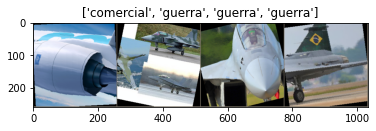

In [ ]:
inputs, classes = next(iter(dataloaders['train']))

out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
res_mod = models.resnet34(pretrained=True)

num_ftrs = res_mod.fc.in_features
res_mod.fc = nn.Linear(num_ftrs, 2)


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
res_mod

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
for name, child in res_mod.named_children():
    print(name)

conv1
bn1
relu
maxpool
layer1
layer2
layer3
layer4
avgpool
fc


In [ ]:
res_mod = res_mod.to(device)
criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(res_mod.parameters(), lr=0.001, momentum=0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=10):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        for phase in ['train', 'valid']:
            if phase == 'train':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            current_loss = 0.0
            current_corrects = 0

            # Here's where the training happens
            print('Iterating through data...')

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # We need to zero the gradients, don't forget it
                optimizer.zero_grad()

                # Time to carry out the forward training poss
                # We only need to log the loss stats if we are in training phase
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # We want variables to hold the loss statistics
                current_loss += loss.item() * inputs.size(0)
                current_corrects += torch.sum(preds == labels.data)

            epoch_loss = current_loss / dataset_sizes[phase]
            epoch_acc = current_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # Make a copy of the model if the accuracy on the validation set has improved
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_since = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_since // 60, time_since % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # Now we'll load in the best model weights and return it
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
def visualize_model(model, num_images=30):
    was_training = model.training
    model.eval()
    images_handeled = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['valid']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_handeled += 1
                ax = plt.subplot(num_images//2, 2, images_handeled)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_handeled == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

Epoch 0/2
----------
Iterating through data...


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


train Loss: 0.6287 Acc: 0.7249
Iterating through data...
valid Loss: 0.3725 Acc: 0.8370

Epoch 1/2
----------
Iterating through data...


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


train Loss: 0.5185 Acc: 0.7807
Iterating through data...
valid Loss: 0.6225 Acc: 0.7481

Epoch 2/2
----------
Iterating through data...


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


train Loss: 0.5164 Acc: 0.7881
Iterating through data...
valid Loss: 0.3026 Acc: 0.8741

Training complete in 16m 5s
Best val Acc: 0.874074


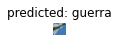

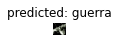

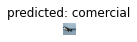

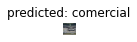

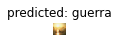

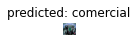

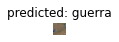

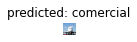

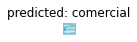

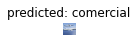

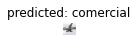

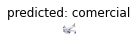

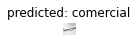

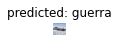

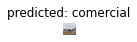

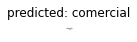

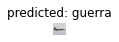

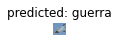

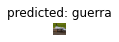

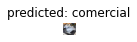

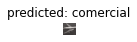

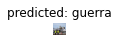

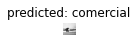

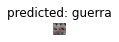

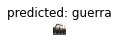

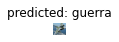

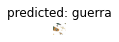

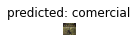

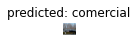

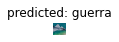

In [ ]:
base_model = train_model(res_mod, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=3)
visualize_model(base_model)
plt.show()

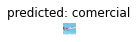

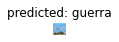

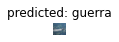

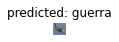

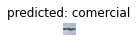

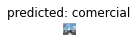

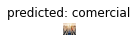

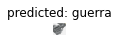

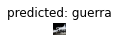

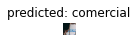

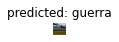

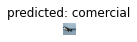

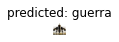

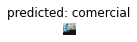

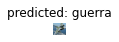

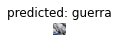

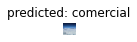

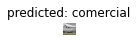

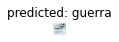

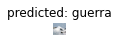

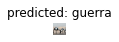

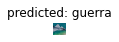

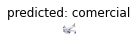

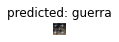

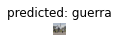

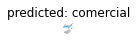

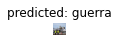

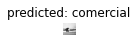

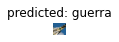

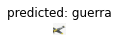

In [ ]:
visualize_model(base_model)